In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from pylab import rcParams
import statsmodels.tsa.api as tsa

from keras.models import Sequential
from keras.layers import Dense

In [2]:
path = '/KWATER/data/csv/'

In [3]:
df1 = pd.read_csv(path+'AHSWGS0.745-617-CLI-2002.F_CV.csv')
df1.head()

,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:45:15,0,100
0,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:46:00,0.0,100
1,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:47:00,0.0,100
2,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:48:00,0.0,100
3,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:49:00,0.0,100
4,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:50:00,0.0,100


In [4]:
df1.shape

(2501697, 4)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501697 entries, 0 to 2501696
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   AHSWGS0.745-617-CLI-2002.F_CV  object 
 1   2017-02-08 17:45:15            object 
 2   0                              float64
 3   100                            int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 76.3+ MB


In [6]:
df1.columns = ['이름', '요일', 'X값', '고정값']

In [7]:
df1.head()

,이름,요일,X값,고정값
0,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:46:00,0.0,100
1,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:47:00,0.0,100
2,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:48:00,0.0,100
3,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:49:00,0.0,100
4,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:50:00,0.0,100


In [8]:
df1.isnull().sum()

이름     0
요일     0
X값     0
고정값    0
dtype: int64

In [9]:
df1['고정값'].value_counts()

100    2501697
Name: 고정값, dtype: int64

In [10]:
df1['X값'].value_counts()

0.000000    89840
0.000500    12425
0.000750    12056
0.000375     9244
0.039000     6939
            ...  
1.105000        1
1.005625        1
1.208500        1
0.975500        1
1.219500        1
Name: X값, Length: 8955, dtype: int64

In [11]:
df1['Datetime'] = pd.to_datetime(df1['요일'])
df1['Year']= df1['Datetime'].dt.year
df1['Month']= df1['Datetime'].dt.month
df1['Day']= df1['Datetime'].dt.day
df1['day_of_week']= df1['Datetime'].dt.day_name()

In [12]:
df1

,이름,요일,X값,고정값,Datetime,Year,Month,Day,day_of_week
0,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:46:00,0.000000,100,2017-02-08 17:46:00,2017,2,8,Wednesday
1,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:47:00,0.000000,100,2017-02-08 17:47:00,2017,2,8,Wednesday
2,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:48:00,0.000000,100,2017-02-08 17:48:00,2017,2,8,Wednesday
3,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:49:00,0.000000,100,2017-02-08 17:49:00,2017,2,8,Wednesday
4,AHSWGS0.745-617-CLI-2002.F_CV,2017-02-08 17:50:00,0.000000,100,2017-02-08 17:50:00,2017,2,8,Wednesday
...,...,...,...,...,...,...,...,...,...
2501692,AHSWGS0.745-617-CLI-2002.F_CV,2021-11-17 02:44:00,0.585875,100,2021-11-17 02:44:00,2021,11,17,Wednesday
2501693,AHSWGS0.745-617-CLI-2002.F_CV,2021-11-17 02:45:00,0.590375,100,2021-11-17 02:45:00,2021,11,17,Wednesday
2501694,AHSWGS0.745-617-CLI-2002.F_CV,2021-11-17 02:46:00,0.585750,100,2021-11-17 02:46:00,2021,11,17,Wednesday
2501695,AHSWGS0.745-617-CLI-2002.F_CV,2021-11-17 02:47:00,0.572125,100,2021-11-17 02:47:00,2021,11,17,Wednesday


In [13]:
df1.isnull().sum()

이름             0
요일             0
X값             0
고정값            0
Datetime       0
Year           0
Month          0
Day            0
day_of_week    0
dtype: int64

In [14]:
p1 = pd.pivot_table(data=df1, index='Datetime', values='X값',aggfunc='sum').reset_index()

In [15]:
p1

,Datetime,X값
0,2017-02-08 17:46:00,0.000000
1,2017-02-08 17:47:00,0.000000
2,2017-02-08 17:48:00,0.000000
3,2017-02-08 17:49:00,0.000000
4,2017-02-08 17:50:00,0.000000
...,...,...
2501692,2021-11-17 02:44:00,0.585875
2501693,2021-11-17 02:45:00,0.590375
2501694,2021-11-17 02:46:00,0.585750
2501695,2021-11-17 02:47:00,0.572125


In [16]:
rcParams['figure.figsize'] = 15,5

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

# sns.lineplot(data=p1, x='Datetime', y='X값')

<AxesSubplot:xlabel='Datetime', ylabel='X값'>

/home/kwater/anaconda3/envs/gpu3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/kwater/anaconda3/envs/gpu3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)


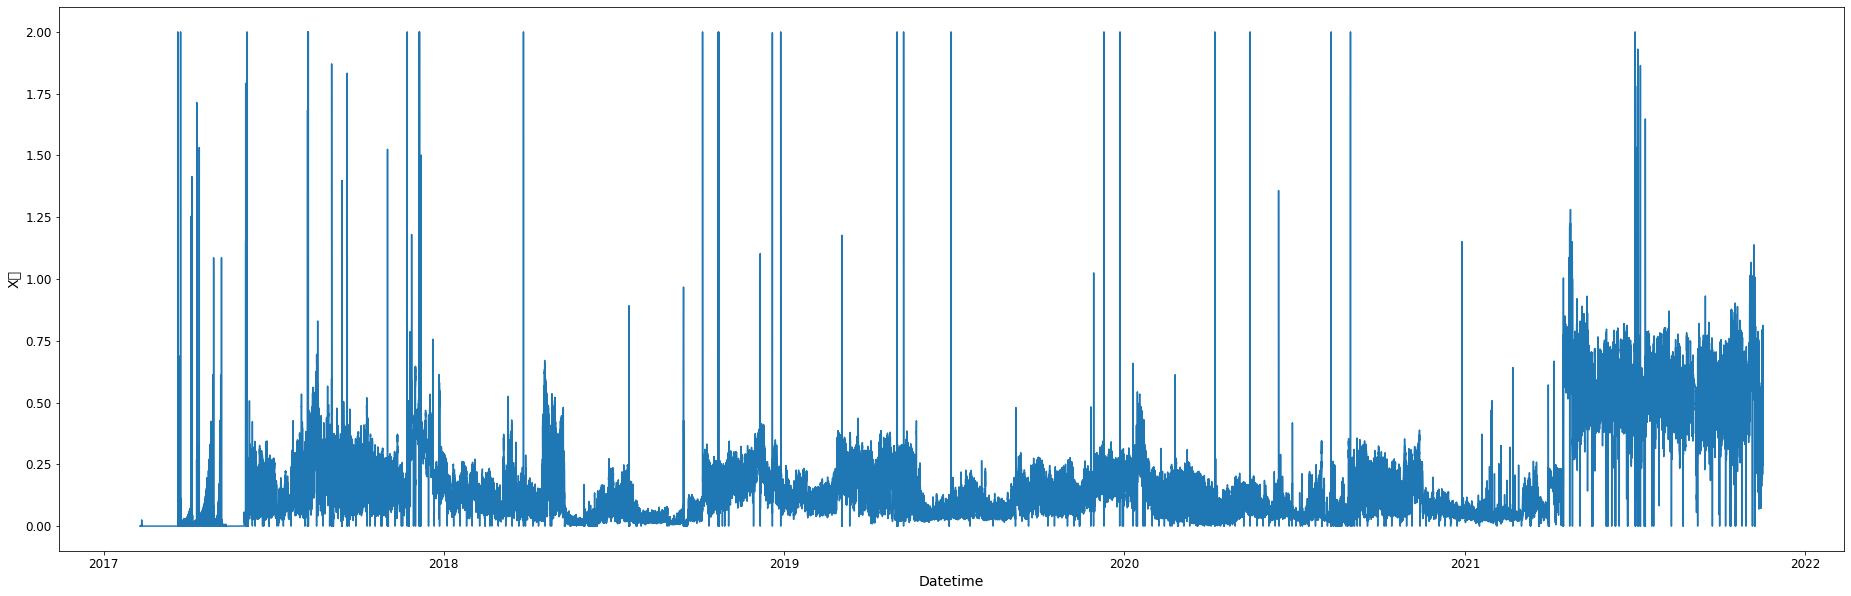

In [17]:
plt.figure(figsize= [32,10])
sns.lineplot(data=p1, x='Datetime' ,y='X값', ci=None , estimator=sum )

In [18]:
p1

,Datetime,X값
0,2017-02-08 17:46:00,0.000000
1,2017-02-08 17:47:00,0.000000
2,2017-02-08 17:48:00,0.000000
3,2017-02-08 17:49:00,0.000000
4,2017-02-08 17:50:00,0.000000
...,...,...
2501692,2021-11-17 02:44:00,0.585875
2501693,2021-11-17 02:45:00,0.590375
2501694,2021-11-17 02:46:00,0.585750
2501695,2021-11-17 02:47:00,0.572125


In [19]:
p1.set_index('Datetime', inplace = True)

In [20]:
p1 = p1.loc[p1.index >= '2018-01-01',:]
p1 = p1.loc[p1.index < '2021-01-01',:]

In [21]:
p1

,X값
Datetime,
2018-01-01 00:01:00,0.207250
2018-01-01 00:02:00,0.204625
2018-01-01 00:03:00,0.204750
2018-01-01 00:04:00,0.209125
2018-01-01 00:05:00,0.205625
...,...
2020-12-31 23:55:00,0.043875
2020-12-31 23:56:00,0.044375
2020-12-31 23:57:00,0.057750


In [22]:
# p1_train = p1.loc[p1.index >= '2017-12-01',:]
# p1_test = p1.loc[p1.index < '2017-12-01',:]
# print(p1_train.shape, p1_test.shape)

In [23]:
# p2 = pd.pivot_table(data=p1, index='Datetime', values='X값',aggfunc='sum').reset_index()

In [24]:
p2 = p1['X값'].resample('1D').mean()

In [25]:
p2

Datetime
2018-01-01    0.216538
2018-01-02    0.206533
2018-01-03    0.193358
2018-01-04    0.145269
2018-01-05    0.135213
                ...   
2020-12-27    0.048015
2020-12-28    0.060726
2020-12-29    0.063274
2020-12-30    0.061901
2020-12-31    0.051026
Freq: D, Name: X값, Length: 1096, dtype: float64

In [26]:
p2.isnull().sum()

0

In [27]:
p3 = p2.fillna( method='ffill' )

In [28]:
p3.isnull().sum()

0

/home/kwater/anaconda3/envs/gpu3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/kwater/anaconda3/envs/gpu3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0, flags=flags)


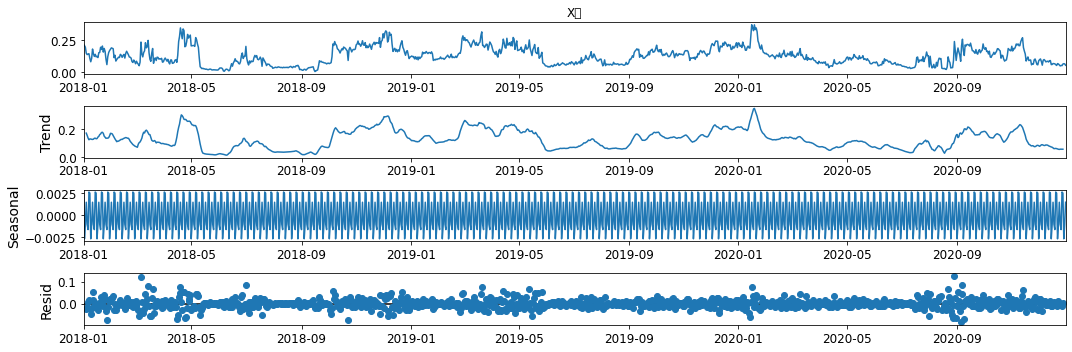

In [29]:
model_series = tsa.seasonal_decompose(p3, model='additive')
fig = model_series.plot()
plt.show()

In [30]:
import itertools

In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [32]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [33]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [35]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(p3,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

/home/kwater/anaconda3/envs/gpu3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/kwater/anaconda3/envs/gpu3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [36]:
# p = d = q = range(0, 3)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [37]:
# best_aic = np.inf
# best_pdq = None
# best_seasonal_pdq = None
# tmp_model = None
# best_md1 = None

# for param in pdq:
#      for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(p3,order=param, exog =None,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=True,
#                                             enforce_invertibility=True)
#             res = mod.fit()
#             print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, res.aic))
#             if res.aic < best_aic:
#                 best_aic = res.aic
#                 best_pdq = param
#                 best_seasonal_pdq = param_seasonal
#                 best_mdl = tmp_mdl
#         except:
            
#             continue
    
#             param_list.append(param)
#             param_seasonal_list.append(param_seasonal)
#             results_AIC_list.append(results.aic)
#         except:
#              continue
# print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic)

In [38]:
# md1 = sm.tsa.statespace.SARIMAX(endog = y_train, order =(1, 1, 0),
#                                             seasonal_order=(1, 2, 1, 12),
#                                             enforce_stationarity=True,
#                                             enforce_invertibility=True)
# res = mdl.fit()

In [39]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
# ARIMA_list.to_excel('arima_model_list.xlsx')

In [40]:
ARIMA_list.sort_values(by='AIC').head()

,Parameter,Seasonal,AIC
56,"(1, 1, 1)","(0, 0, 0, 12)",-4827.981055
40,"(1, 0, 1)","(0, 0, 0, 12)",-4813.708378
24,"(0, 1, 1)","(0, 0, 0, 12)",-4802.910574
32,"(1, 0, 0)","(0, 0, 0, 12)",-4801.589445
48,"(1, 1, 0)","(0, 0, 0, 12)",-4799.991856


In [41]:
mod = tsa.statespace.SARIMAX(p3,order=(1, 1, 1),seasonal_order=(0, 0, 0, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                     X값   No. Observations:                 1096
Model:               SARIMAX(1, 1, 1)   Log Likelihood                2416.991
Date:                Mon, 03 Jan 2022   AIC                          -4827.981
Time:                        13:00:58   BIC                          -4812.991
Sample:                    01-01-2018   HQIC                         -4822.308
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6034      0.053     11.282      0.000       0.499       0.708
ma.L1         -0.7736      0.046    -16.992      0.000      -0.863      -0.684
sigma2         0.0007   1.65e-05     42.615      0.0

/home/kwater/anaconda3/envs/gpu3/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


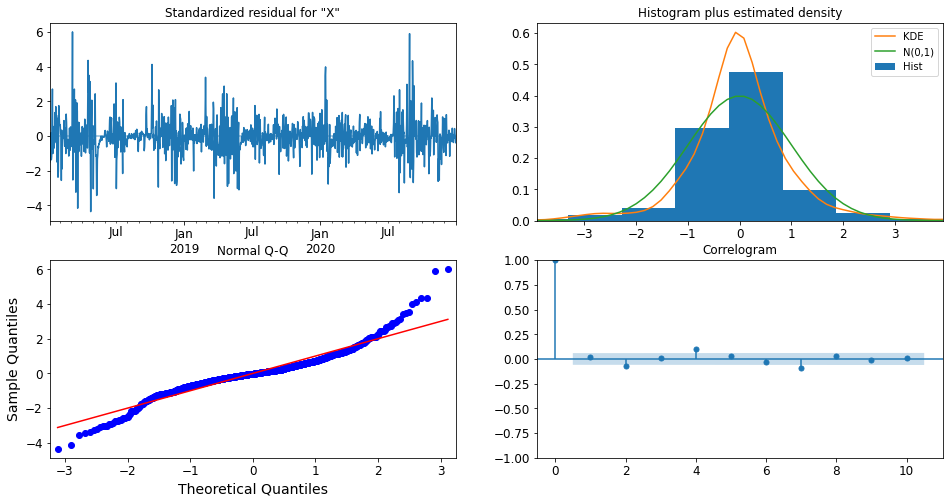

In [42]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [43]:
results.get_prediction()

In [44]:
p3.head()

Datetime
2018-01-01    0.216538
2018-01-02    0.206533
2018-01-03    0.193358
2018-01-04    0.145269
2018-01-05    0.135213
Freq: D, Name: X값, dtype: float64

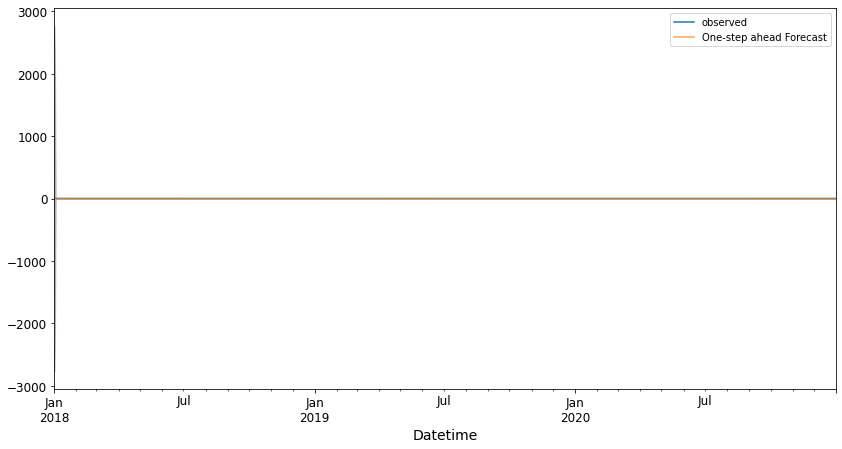

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = p3.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [46]:
pred = results.get_prediction(start=pd.to_datetime('2018-03-01'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,Datetime,predicted_mean
0,2018-03-01,0.068793
1,2018-03-02,0.083914
2,2018-03-03,0.071637
3,2018-03-04,0.063239
4,2018-03-05,0.052557
...,...,...
1032,2020-12-27,0.050752
1033,2020-12-28,0.049217
1034,2020-12-29,0.059492
1035,2020-12-30,0.061886


In [47]:
y_forecasted = pred.predicted_mean
y_truth = p2['2017-02-08':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 0.0


In [48]:
pred_uc = results.get_forecast(steps=50)

In [49]:
pred_uc.predicted_mean

2021-01-01    0.052227
2021-01-02    0.052952
2021-01-03    0.053389
2021-01-04    0.053653
2021-01-05    0.053812
2021-01-06    0.053908
2021-01-07    0.053966
2021-01-08    0.054001
2021-01-09    0.054022
2021-01-10    0.054035
2021-01-11    0.054043
2021-01-12    0.054047
2021-01-13    0.054050
2021-01-14    0.054052
2021-01-15    0.054053
2021-01-16    0.054053
2021-01-17    0.054054
2021-01-18    0.054054
2021-01-19    0.054054
2021-01-20    0.054054
2021-01-21    0.054054
2021-01-22    0.054054
2021-01-23    0.054054
2021-01-24    0.054054
2021-01-25    0.054054
2021-01-26    0.054054
2021-01-27    0.054054
2021-01-28    0.054054
2021-01-29    0.054054
2021-01-30    0.054054
2021-01-31    0.054054
2021-02-01    0.054054
2021-02-02    0.054054
2021-02-03    0.054054
2021-02-04    0.054054
2021-02-05    0.054054
2021-02-06    0.054054
2021-02-07    0.054054
2021-02-08    0.054054
2021-02-09    0.054054
2021-02-10    0.054054
2021-02-11    0.054054
2021-02-12    0.054054
2021-02-13 

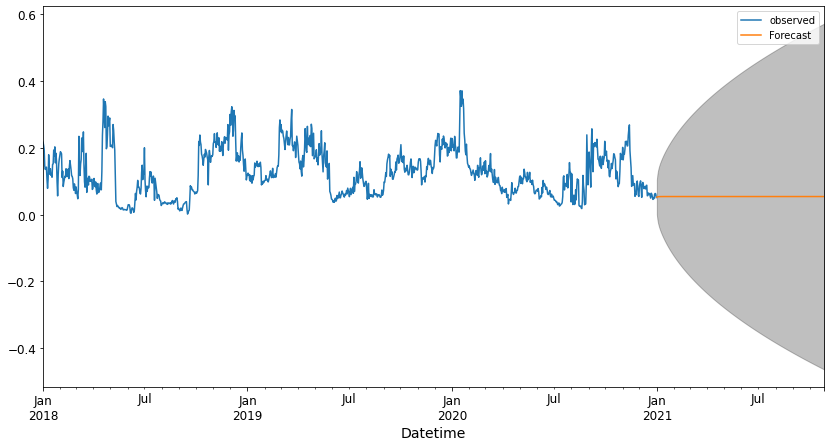

In [50]:
pred_uc = results.get_forecast(steps=300)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = p3.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()